In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
import tensorflow as tf

In [2]:
df=pd.read_csv("C:\\Users\\rudra\\Downloads\\MOCK_DATA.csv")

In [3]:
df

,Area_Name,No_of_street_light,Type_Area,No_of_men,No_of_women,Women_safety_ratio,Safe_or_unsafe,range
0,Mavdi,34,Urban,4865,5641,0.45,Safe,4388698
1,Vallabh Vidyanagar,108,Suburban,958,2287,0.79,Unsafe,848210
2,Gondal Road,21,Suburban,9075,1540,0.24,Unsafe,1836756
3,Chandkheda,140,Suburban,890,7481,0.38,Safe,1168629
4,Karamsad,22,Rural,3082,5038,0.91,Unsafe,3290619
...,...,...,...,...,...,...,...,...
995,Girnar Darwaza,165,Rural,9343,366,0.70,Safe,8537984
996,Kalwa Chowk,185,Suburban,7724,6334,0.56,Unsafe,5149371
997,Bedi Road,119,Urban,8486,6540,0.46,Unsafe,9945414
998,Chitra,91,Rural,3032,142,0.53,Safe,2642755


In [4]:
le=LabelEncoder()
df["Type_Area"]=le.fit_transform(df["Type_Area"])


In [5]:
df["Safe_or_unsafe"]=le.fit_transform(df["Safe_or_unsafe"])
df

,Area_Name,No_of_street_light,Type_Area,No_of_men,No_of_women,Women_safety_ratio,Safe_or_unsafe,range
0,Mavdi,34,2,4865,5641,0.45,0,4388698
1,Vallabh Vidyanagar,108,1,958,2287,0.79,1,848210
2,Gondal Road,21,1,9075,1540,0.24,1,1836756
3,Chandkheda,140,1,890,7481,0.38,0,1168629
4,Karamsad,22,0,3082,5038,0.91,1,3290619
...,...,...,...,...,...,...,...,...
995,Girnar Darwaza,165,0,9343,366,0.70,0,8537984
996,Kalwa Chowk,185,1,7724,6334,0.56,1,5149371
997,Bedi Road,119,2,8486,6540,0.46,1,9945414
998,Chitra,91,0,3032,142,0.53,0,2642755


In [6]:
dummies=pd.get_dummies(df["Area_Name"])
dummies=dummies.astype(int)

In [7]:
df=pd.concat([df,dummies],axis="columns")
df

,Area_Name,No_of_street_light,Type_Area,No_of_men,No_of_women,Women_safety_ratio,Safe_or_unsafe,range,Adajan,Air Force Area,...,Vadtal,Vallabh Nagar,Vallabh Vidyanagar,Varachha,Vastrapur,Vesu,Vidyanagar,Waghodia Road,Zadeshwar,Zanzarda Road
0,Mavdi,34,2,4865,5641,0.45,0,4388698,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vallabh Vidyanagar,108,1,958,2287,0.79,1,848210,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Gondal Road,21,1,9075,1540,0.24,1,1836756,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chandkheda,140,1,890,7481,0.38,0,1168629,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Karamsad,22,0,3082,5038,0.91,1,3290619,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Girnar Darwaza,165,0,9343,366,0.70,0,8537984,0,0,...,0,0,0,0,0,0,0,0,0,0
996,Kalwa Chowk,185,1,7724,6334,0.56,1,5149371,0,0,...,0,0,0,0,0,0,0,0,0,0
997,Bedi Road,119,2,8486,6540,0.46,1,9945414,0,0,...,0,0,0,0,0,0,0,0,0,0
998,Chitra,91,0,3032,142,0.53,0,2642755,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df["crowdness_factor"] = ((df["No_of_men"] + df["No_of_women"]) / df["range"])*100
df["No_of_men"] = df["No_of_men"] / 1000
df["No_of_women"] = df["No_of_women"] / 1000
df1=df.drop(["range","No_of_men","No_of_women","Area_Name","No_of_street_light"],axis="columns")

In [9]:
df1.shape

(1000, 103)

In [10]:
df1["crowdness_factor"].quantile(0.95)
df

,Area_Name,No_of_street_light,Type_Area,No_of_men,No_of_women,Women_safety_ratio,Safe_or_unsafe,range,Adajan,Air Force Area,...,Vallabh Nagar,Vallabh Vidyanagar,Varachha,Vastrapur,Vesu,Vidyanagar,Waghodia Road,Zadeshwar,Zanzarda Road,crowdness_factor
0,Mavdi,34,2,4.865,5.641,0.45,0,4388698,0,0,...,0,0,0,0,0,0,0,0,0,0.239388
1,Vallabh Vidyanagar,108,1,0.958,2.287,0.79,1,848210,0,0,...,0,1,0,0,0,0,0,0,0,0.382570
2,Gondal Road,21,1,9.075,1.540,0.24,1,1836756,0,0,...,0,0,0,0,0,0,0,0,0,0.577921
3,Chandkheda,140,1,0.890,7.481,0.38,0,1168629,0,0,...,0,0,0,0,0,0,0,0,0,0.716309
4,Karamsad,22,0,3.082,5.038,0.91,1,3290619,0,0,...,0,0,0,0,0,0,0,0,0,0.246762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Girnar Darwaza,165,0,9.343,0.366,0.70,0,8537984,0,0,...,0,0,0,0,0,0,0,0,0,0.113715
996,Kalwa Chowk,185,1,7.724,6.334,0.56,1,5149371,0,0,...,0,0,0,0,0,0,0,0,0,0.273004
997,Bedi Road,119,2,8.486,6.540,0.46,1,9945414,0,0,...,0,0,0,0,0,0,0,0,0,0.151085
998,Chitra,91,0,3.032,0.142,0.53,0,2642755,0,0,...,0,0,0,0,0,0,0,0,0,0.120102


In [11]:
df1=df1[~(df1["crowdness_factor"]>1.89)]
df1.shape

(949, 103)

In [12]:
df1=df1[~((df1["Safe_or_unsafe"]==1)&(df1["Women_safety_ratio"]<0.5))]
df1.shape

(727, 103)

In [13]:
y=df1["Safe_or_unsafe"]

<Axes: >

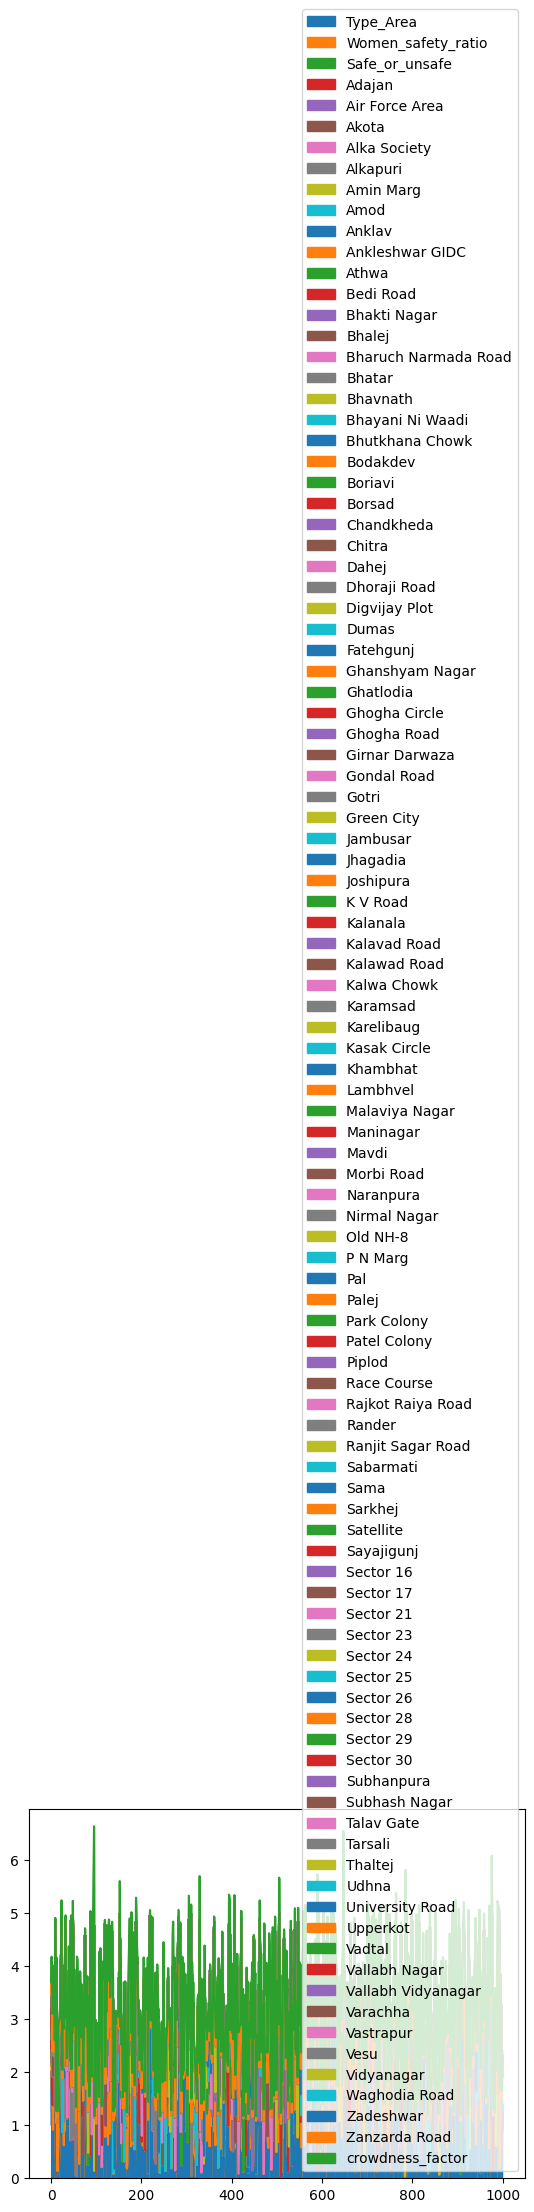

In [14]:
df1.plot.area()

In [15]:
X=df1.drop(["Safe_or_unsafe"],axis="columns")
X=np.array(X)
X.shape

(727, 102)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:

sc=StandardScaler(with_mean=True,with_std=True)
sc.fit_transform(np.array(X).reshape(-1, 1))

array([[11.11233509],
       [ 2.37641706],
       [-0.15981721],
       ...,
       [-0.15981721],
       [-0.15981721],
       [ 0.53410051]])

In [18]:
cross_val_score(GaussianNB(),X_train,y_train,cv=15)

array([0.35897436, 0.35897436, 0.43589744, 0.38461538, 0.41025641,
       0.35897436, 0.38461538, 0.48717949, 0.41025641, 0.41025641,
       0.43589744, 0.39473684, 0.39473684, 0.34210526, 0.34210526])

In [19]:
model_params = {
    "svm": {
        "model": SVC(),
        "params": {
            "C": [
                0.25,
                0.2,
                0.3,
                0.35,
                0.4,
                0.45,
                0.5,
                0.55,
                0.65,
                0.6,
                0.7,
                0.8,
                0.9,
                1,
                1.5,
                2,
            ],
            "gamma": ["scale", "auto"],
        },
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [25, 30, 40, 50, 60, 65, 70, 75, 80, 90, 95]},
        "criterion": ["gini", "entropy", "log_loss"],
        "max_features": ["sqrt", "log2"],
        "random_state": [5, 7, 10, 13, 15],
    },
    "logistic_regression": {
        "model": LogisticRegression(),
        "params": {"C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
    },
    "Decision_tree": {
        "model": DecisionTreeClassifier(),
        "params": {"splitter": ["best", "random"]},
        "criterion": ["gini", "entropy", "log_loss"],
        "max_features": ["auto", "sqrt", "log2"],
    },
    "Naive_Bayes": {"model": MultinomialNB(), "params": {"alpha": [1, 3, 5, 7, 9, 10]}},
    "Guassin_Bayes": {"model": GaussianNB(), "params": {}},
}

In [20]:
model=RandomForestClassifier(n_estimators=20,criterion="gini",max_features="sqrt")

In [21]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6095890410958904

In [22]:
# score = []

# for model_name, mp in model_params.items():
#     clf = GridSearchCV(mp["model"], mp["params"], cv=15, return_train_score=True)
#     clf.fit(X_train, y_train)
#     score.append(
#         {
#             "model": model_name,
#             "best_score": clf.best_score_,
#             "best_params": clf.best_params_,
#             "index": clf.best_index_,
#         }
#     )
# fm = pd.DataFrame(score, columns=["model", "best_score", "best_params"])
# fm

In [23]:
# model=LogisticRegression(C=1)
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

In [24]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(102,)),
    # keras.layers.Dense(100, activation="relu"),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [25]:
type(X_train)

numpy.ndarray

In [26]:
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
19/19 [==============================] - 1s 4ms/step - loss: 0.7177 - accuracy: 0.4079
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 0.7037 - accuracy: 0.4699
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5439
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.6127
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.6575
Epoch 6/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.6747
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6747
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6764
Epoch 9/500
19/19 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6695
Epoch 10/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6695
Epoch 11/

In [27]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.9960 - accuracy: 0.6712


[0.9959582090377808, 0.6712328791618347]

In [28]:
import pickle

In [29]:
# with open("model.pkl",'wb') as f:
#     pickle.dump(model,f)

In [30]:
y_pred=model.predict(X_test)
y_pred.round()

5/5 [==============================] - 0s 0s/step


array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],

In [31]:
from sklearn.metrics import classification_report

classification_report(y_test,y_pred.round())

'              precision    recall  f1-score   support\n\n           0       0.75      0.78      0.76        98\n           1       0.50      0.46      0.48        48\n\n    accuracy                           0.67       146\n   macro avg       0.62      0.62      0.62       146\nweighted avg       0.66      0.67      0.67       146\n'

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 102)               0         
                                                                 
 dense (Dense)               (None, 5)                 515       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 521 (2.04 KB)
Trainable params: 521 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
X_train

array([[0.        , 0.25      , 0.        , ..., 0.        , 0.        ,
        0.2422572 ],
       [1.        , 0.68      , 0.        , ..., 0.        , 0.        ,
        0.1067273 ],
       [0.        , 0.68      , 0.        , ..., 0.        , 0.        ,
        0.22406064],
       ...,
       [1.        , 0.52      , 0.        , ..., 0.        , 0.        ,
        0.11479305],
       [0.        , 0.2       , 0.        , ..., 0.        , 0.        ,
        0.0609296 ],
       [2.        , 0.02      , 0.        , ..., 0.        , 0.        ,
        0.18288825]])

In [39]:
import json
# json_str = df1.to_json(orient='records')
# json_obj = json.loads(json_str)
# with open("df.json",'w') as f:
#     f.write(json.dumps(json_obj)) 
# columns={
#     "columns": [col.lower() for col in df.columns]
# }
# with open("Area_name.json",'w') as f:
#     f.write(json.dumps(columns))

In [40]:
df1

,Type_Area,Women_safety_ratio,Safe_or_unsafe,Adajan,Air Force Area,Akota,Alka Society,Alkapuri,Amin Marg,Amod,...,Vallabh Nagar,Vallabh Vidyanagar,Varachha,Vastrapur,Vesu,Vidyanagar,Waghodia Road,Zadeshwar,Zanzarda Road,crowdness_factor
0,2,0.45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.239388
1,1,0.79,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.382570
3,1,0.38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.716309
4,0,0.91,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.246762
5,1,0.93,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.293699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.458251
995,0,0.70,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.113715
996,1,0.56,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.273004
998,0,0.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.120102


In [41]:
def predict_safety(location):
    loc_idx = np.where(df1.columns == location)[0][0]
    with open("df.json",'r') as f:
        data=json.load(f)
        x = np.zeros(len(df1.columns)-1)
        x[0] = data[loc_idx]["Type_Area"]
        x[1] = data[loc_idx]["Women_safety_ratio"]
        x[101] = data[loc_idx]["crowdness_factor"]
        if loc_idx >= 0:
            x[loc_idx] = 1
        x = np.expand_dims(x, axis=0)
    return round(model.predict([x])[0][0])

In [42]:
predict_safety("Vallabh Nagar")

1/1 [==============================] - 0s 120ms/step


0